In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab.patches import cv2_imshow

In [4]:
!pip install opencv-python-headless
!pip install matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


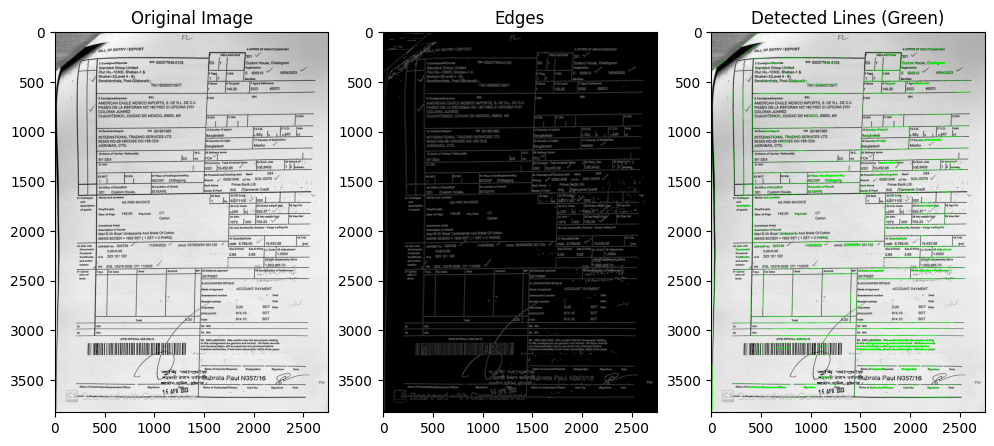

Line 1: Start Point (410, 2692), End Point (412, 2559)
Line 2: Start Point (2187, 1613), End Point (2415, 1610)
Line 3: Start Point (2431, 1389), End Point (2544, 1388)
Line 4: Start Point (2225, 1066), End Point (2466, 1062)
Line 5: Start Point (1991, 1402), End Point (2190, 1399)
Line 6: Start Point (1468, 1634), End Point (1618, 1632)
Line 7: Start Point (513, 2986), End Point (966, 2986)
Line 8: Start Point (775, 2991), End Point (1132, 2991)
Line 9: Start Point (2482, 1172), End Point (2587, 1171)
Line 10: Start Point (1873, 1188), End Point (2063, 1185)
Line 11: Start Point (758, 2927), End Point (957, 2927)
Line 12: Start Point (1667, 3057), End Point (2021, 3057)
Line 13: Start Point (450, 630), End Point (1054, 630)
Line 14: Start Point (1474, 2923), End Point (1910, 2923)
Line 15: Start Point (404, 2558), End Point (406, 2414)
Line 16: Start Point (2212, 833), End Point (2314, 832)
Line 17: Start Point (2222, 3671), End Point (2376, 3671)
Line 18: Start Point (2161, 1293), En

In [12]:
import cv2
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image file in your Google Drive
image_path = '/content/drive/MyDrive/SECTRUM/easy_ocr/prime bank ltdn_11.jpg'

# Read the image from Google Drive
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Create a color version of the line image
line_image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the detected lines in green on the color line image and get line coordinates
line_coordinates = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image_color, (x1, y1), (x2, y2), (0, 255, 0), 2)
    line_coordinates.append(((x1, y1), (x2, y2)))

# Display the original image, edges, and the image with detected lines
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.subplot(133), plt.imshow(line_image_color), plt.title('Detected Lines (Green)')
plt.show()

# Print the coordinates of each line segment
for idx, ((x1, y1), (x2, y2)) in enumerate(line_coordinates):
    print(f"Line {idx + 1}: Start Point ({x1}, {y1}), End Point ({x2}, {y2})")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


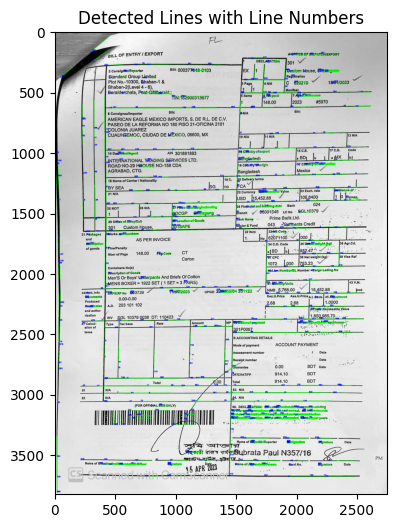

Line 1: Start Point (410, 2692), End Point (412, 2559)
Line 2: Start Point (2187, 1613), End Point (2415, 1610)
Line 3: Start Point (2431, 1389), End Point (2544, 1388)
Line 4: Start Point (2225, 1066), End Point (2466, 1062)
Line 5: Start Point (1991, 1402), End Point (2190, 1399)
Line 6: Start Point (1468, 1634), End Point (1618, 1632)
Line 7: Start Point (513, 2986), End Point (966, 2986)
Line 8: Start Point (775, 2991), End Point (1132, 2991)
Line 9: Start Point (2482, 1172), End Point (2587, 1171)
Line 10: Start Point (1873, 1188), End Point (2063, 1185)
Line 11: Start Point (758, 2927), End Point (957, 2927)
Line 12: Start Point (1667, 3057), End Point (2021, 3057)
Line 13: Start Point (450, 630), End Point (1054, 630)
Line 14: Start Point (1474, 2923), End Point (1910, 2923)
Line 15: Start Point (404, 2558), End Point (406, 2414)
Line 16: Start Point (2212, 833), End Point (2314, 832)
Line 17: Start Point (2222, 3671), End Point (2376, 3671)
Line 18: Start Point (2161, 1293), En

In [22]:
import cv2
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image file in your Google Drive
image_path = '/content/drive/MyDrive/SECTRUM/easy_ocr/prime bank ltdn_11.jpg'

# Read the image from Google Drive
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Create a color version of the line image
line_image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the detected lines in green on the color line image and get line coordinates
line_coordinates = []
for idx, line in enumerate(lines):
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image_color, (x1, y1), (x2, y2), (0, 255, 0), 2)
    line_coordinates.append(((x1, y1), (x2, y2)))

    # Draw line number on the image
    cv2.putText(line_image_color, str(idx + 1), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image with detected lines and line numbers
plt.figure(figsize=(10, 6))
plt.imshow(line_image_color)
plt.title('Detected Lines with Line Numbers')
plt.show()

# Print the coordinates of each line segment
for idx, ((x1, y1), (x2, y2)) in enumerate(line_coordinates):
    print(f"Line {idx + 1}: Start Point ({x1}, {y1}), End Point ({x2}, {y2})")


# Gpt


In [4]:
!pip install opencv-python-headless matplotlib


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the uploaded image
image_path = '/content/drive/MyDrive/SECTRUM/easy_ocr/prime bank ltdn_11.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 3)

# Display the original image with detected contours
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


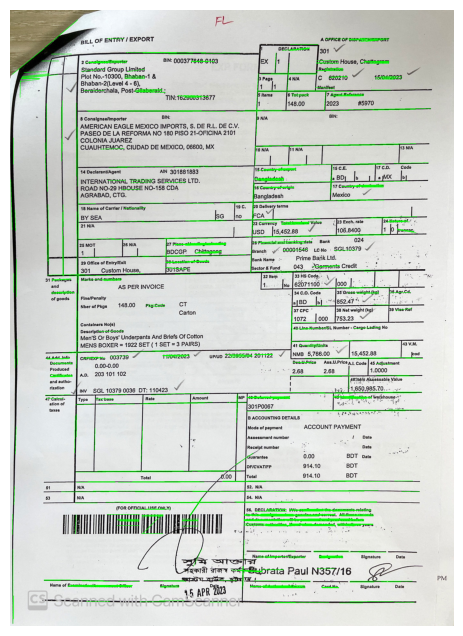

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the uploaded image
image_path = '/content/drive/MyDrive/SECTRUM/easy_ocr/prime bank ltdn_11.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to find lines using the Hough Line Transform
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150, apertureSize=3)

# Find lines using Hough Line Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Draw the detected lines on a copy of the original image
line_image = image.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the original image with detected lines
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


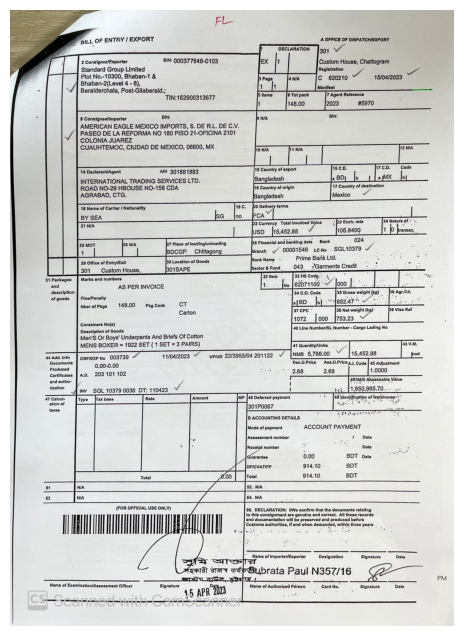

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the uploaded image
image_path = '/content/drive/MyDrive/SECTRUM/easy_ocr/prime bank ltdn_11.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply brightness and contrast adjustments
gray_image = cv2.addWeighted(gray_image, 1.5, gray_image, 0, 0)

# Apply Gaussian blur to remove noise
gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply edge detection using Sobel edge detection algorithm
edges = cv2.Sobel(gray_image, cv2.CV_8U, 1, 0, ksize=3)

# Find lines using Hough Line Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Find the largest lines
largest_lines = sorted(lines, key=lambda line: line[0][0])[-1:]

# Draw the largest lines on a copy of the original image
line_image = image.copy()
for line in largest_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the original image with detected lines
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
